# Project 2

## Problem 1

Using Python, create the following raster products:

1. Calculate the NDVI of the scene
2. Calculate the SAVI of the scene
3. Using Composite Bands, create a 3 band R-G-B image from bands 2, 3, and 4
4. Using Composite Bands, create a false color infrared image from bands 3, 4, 5

Be sure to save the resulting rasters to disk as TIF files.

In [10]:
import os
import arcpy
from arcpy.sa import *

r_path = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B4.TIF'
nir_path = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B5.TIF'
output_folder = r'C:\Users\greg6750\Documents\IPython Notebooks\intro-prog-for-gis-rs\PROJECT_2'

# For point 1, to calculate the NDVI we need NIR and R, that for Landsat 8 are Band 5 and Band 4 respectively    
NIR = arcpy.Raster(nir_path)
R = arcpy.Raster(r_path)

## NDVI

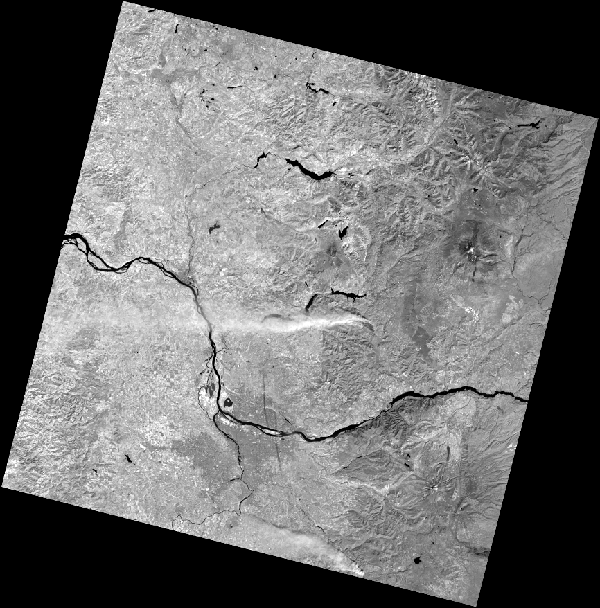

In [11]:
NIR

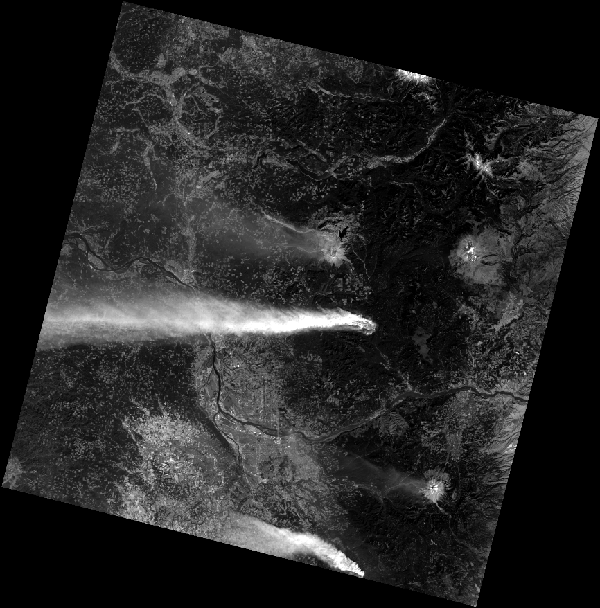

In [12]:
R

In [14]:
# Apply the NDVI formula using map algebra operators
NDVI = (NIR - R) / (NIR + R)

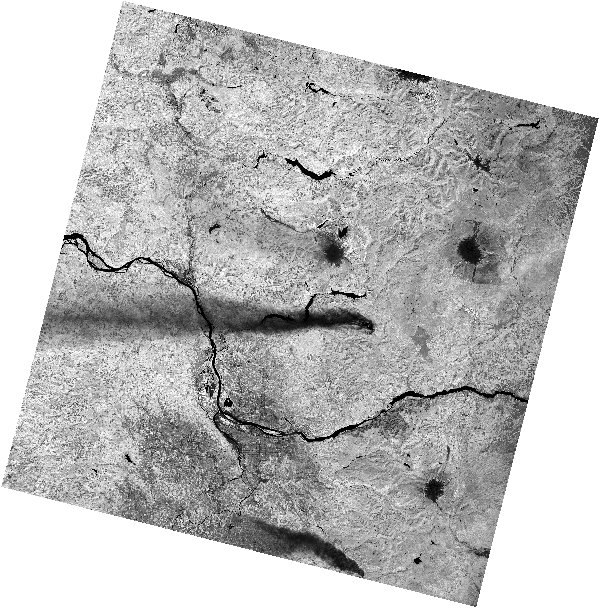

In [15]:
NDVI

In [ ]:
# Save the resulting raster to disk as a TIF file (NDVI.tif) 
NDVI.save(os.path.join(output_folder,"NDVI.tif"))

## SAVI

In [16]:

# For point 2, to calculate the SAVI we need to define the soil brightness correction factor L
L = 0.5

# Apply the SAVI formula using map algebra operators
SAVI = (((NIR - R) / (NIR + R + L)) * (1 + L))

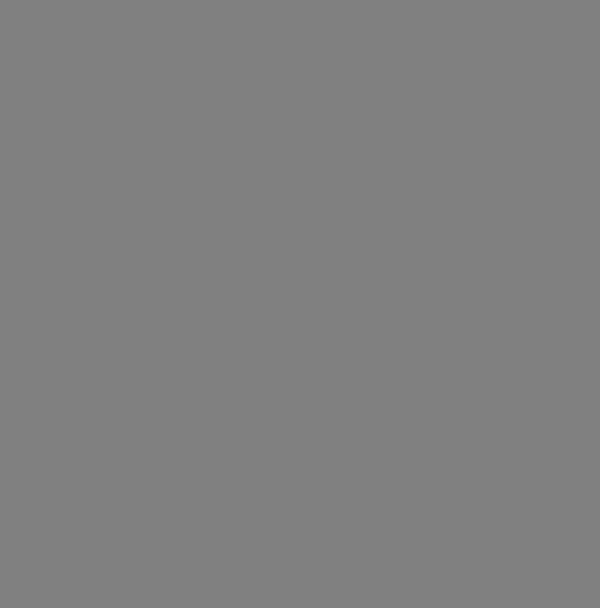

In [17]:
SAVI

### Apply a stretch to see the pixels

https://pro.arcgis.com/en/pro-app/arcpy/image-analyst/stretch.htm

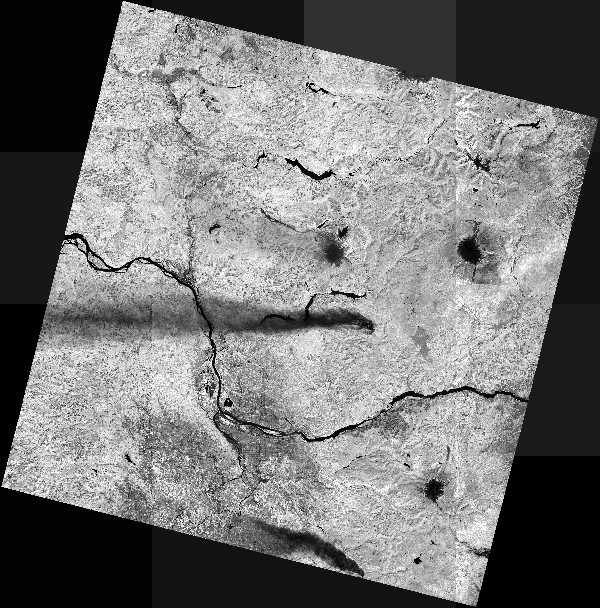

In [19]:
SAVI_Stretch = arcpy.ia.Stretch(SAVI, "PercentClip", None, None, None, None, True, 0.25, 0.75, None, None, None)
SAVI_Stretch

In [20]:
# Save the resulting raster to disk as a TIF file (SAVI.tif)
SAVI.save(os.path.join(output_folder,"SAVI.tif"))

## Create RGB

In [28]:
arcpy.env.overwriteOutput = True

In [29]:
b2 = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B2.TIF'
b3 = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B3.TIF'
b4 = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B4.TIF'

# Create a 3 band R-G-B image from bands 2, 3, and 4 using CompositeBands, and save it as RGB.tif
rgb = arcpy.CompositeBands_management([b4, b3, b2],os.path.join(output_folder,"RGB.tif"))

In [30]:
rgb[0]

'C:\\Users\\greg6750\\Documents\\IPython Notebooks\\intro-prog-for-gis-rs\\PROJECT_2\\RGB.tif'

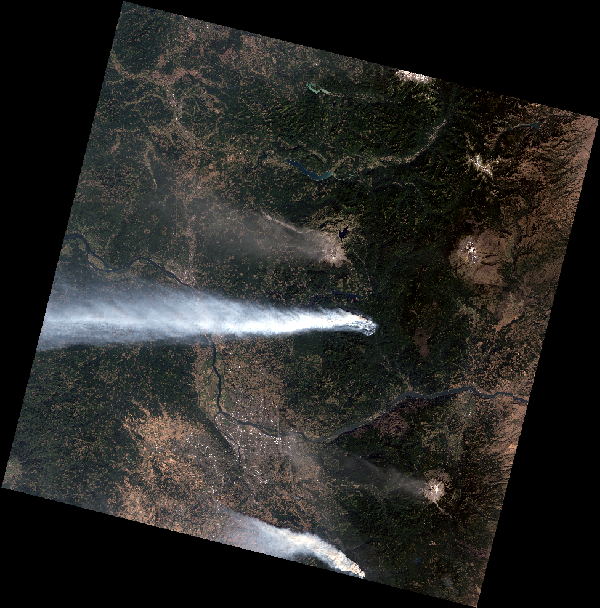

In [31]:
rgb_raster = Raster(rgb[0])
rgb_raster

## Create Infrared

In [32]:
b5 = '/vsicurl/https://landsat-pds.s3.amazonaws.com/c1/L8/046/028/LC08_L1TP_046028_20200908_20200918_01_T1/LC08_L1TP_046028_20200908_20200918_01_T1_B5.TIF'

In [33]:
# Create a false color infrared image from bands 3, 4, 5 using CompositeBands, and save it as FalseColorInfrared.tif
fcir = arcpy.CompositeBands_management([b5, b4, b3], os.path.join(output_folder,"FalseColorInfrared.tif"))

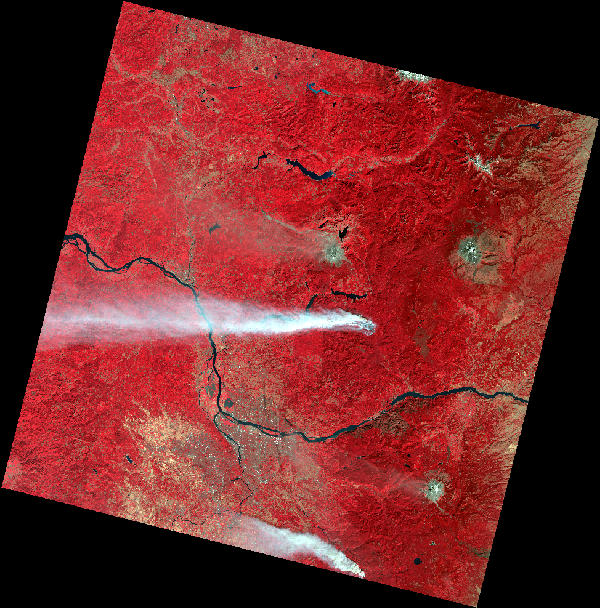

In [34]:
fcir_raster = Raster(fcir[0])
fcir_raster